### *Importing Libraries and loading Data*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
fatalities_df = pd.read_csv("./fatalities.csv")

In [3]:
fatalities_df.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101


In [4]:
fatalities_df.shape

(1749, 7)

In [5]:
fatalities_df.columns

Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric',
       'Sex', 'Value'],
      dtype='object')

In [6]:
# Information about Dataset
fatalities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1749 non-null   int64 
 1   ICD10 Code       1749 non-null   object
 2   ICD10 Diagnosis  1749 non-null   object
 3   Diagnosis Type   1749 non-null   object
 4   Metric           1749 non-null   object
 5   Sex              1166 non-null   object
 6   Value            1749 non-null   object
dtypes: int64(1), object(6)
memory usage: 95.8+ KB


### *Exploratory of Data Analysis*

In [7]:
# Summary Statistics of Numerical Columns
fatalities_df.describe()

,Year
count,1749.000000
mean,2009.000000
std,3.163182
min,2004.000000
25%,2006.000000
50%,2009.000000
75%,2012.000000
max,2014.000000


In [8]:
# Summary Statistics of categorical Columns
fatalities_df.describe(include='object')

,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
count,1749,1749,1749,1749,1166,1749
unique,27,27,10,2,2,1024
top,All codes,All deaths,Cancers which can be caused by smoking,Number of observed deaths,Male,100
freq,66,66,726,891,583,70


### *Handling Missing Value*

In [9]:
# Check missing value
fatalities_df.isnull().sum()

Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                583
Value                0
dtype: int64

In [10]:
fatalities_df.isnull().mean()

Year               0.000000
ICD10 Code         0.000000
ICD10 Diagnosis    0.000000
Diagnosis Type     0.000000
Metric             0.000000
Sex                0.333333
Value              0.000000
dtype: float64

In [11]:
# Fill Null Value with Unknown
fatalities_df['Sex'] = fatalities_df['Sex'].fillna("Unknown")

In [12]:
fatalities_df['Sex']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
4       Unknown
         ...   
1744     Female
1745     Female
1746     Female
1747     Female
1748     Female
Name: Sex, Length: 1749, dtype: object

In [13]:
fatalities_df.isnull().sum()

Year               0
ICD10 Code         0
ICD10 Diagnosis    0
Diagnosis Type     0
Metric             0
Sex                0
Value              0
dtype: int64

### *Data Preparation, Analysis and Visualizations*

In [14]:
fatalities_df.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,Unknown,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,Unknown,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,Unknown,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,Unknown,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,Unknown,126101


In [15]:
year = fatalities_df['Year'].value_counts()
year

Year
2014    159
2013    159
2012    159
2011    159
2010    159
2009    159
2008    159
2007    159
2006    159
2005    159
2004    159
Name: count, dtype: int64

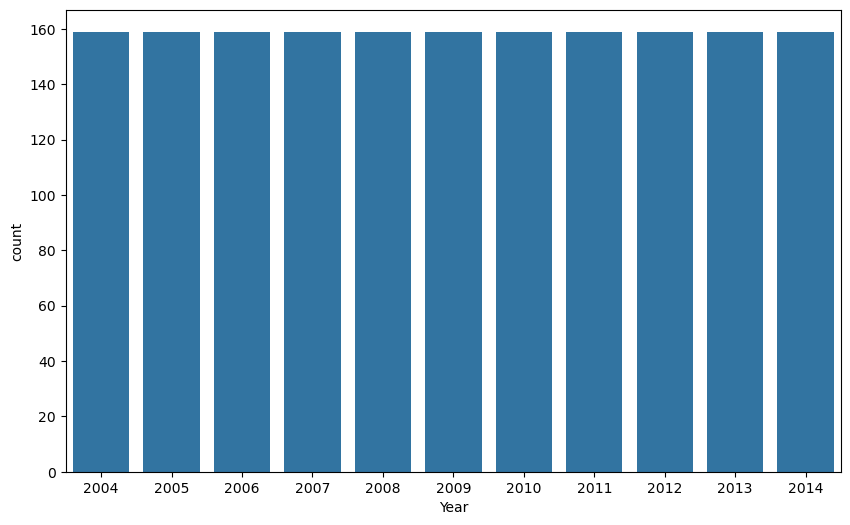

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Year', data=fatalities_df)
plt.show()

In [17]:
diagnosis_ICD = fatalities_df['ICD10 Diagnosis'].value_counts()
diagnosis_ICD

ICD10 Diagnosis
All deaths                                   66
Pancreas                                     66
Atherosclerosis                              66
Aortic Aneurysm                              66
Cerebrovascular Disease                      66
Other arterial disease                       66
Ischaemic Heart Disease                      66
Other Heart Disease                          66
Pneumonia, Influenza                         66
Chronic Airway Obstruction                   66
Chronic Obstructive Lung Disease             66
Myeloid Leukaemia                            66
Unspecified Site                             66
Stomach                                      66
Kidney and Renal Pelvis                      66
Bladder                                      66
Cervical                                     66
Oesophagus                                   66
Larynx                                       66
Upper Respiratory Sites                      66
Trachea, Lung, Bronchus 

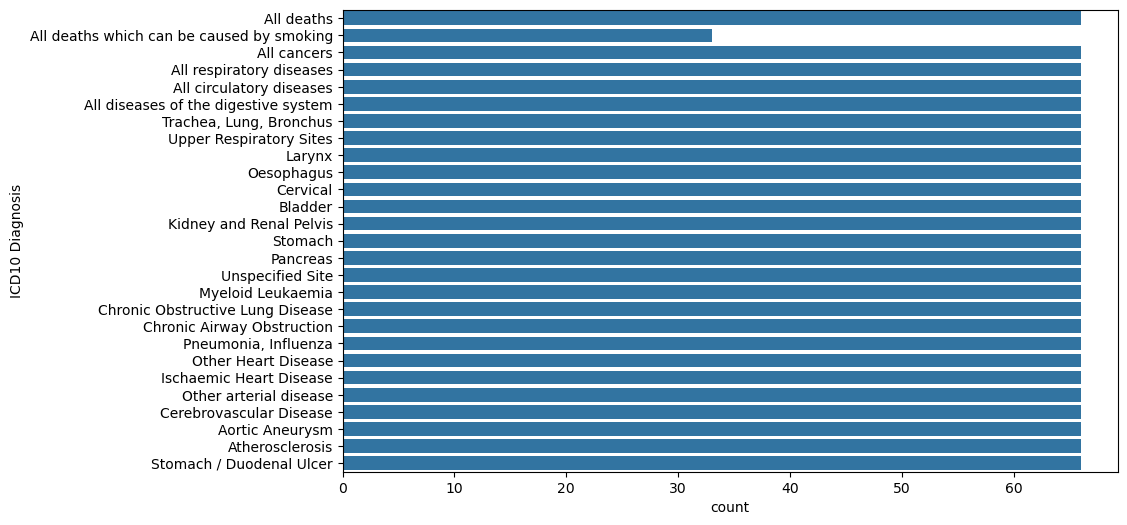

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y='ICD10 Diagnosis', data=fatalities_df)
plt.show()

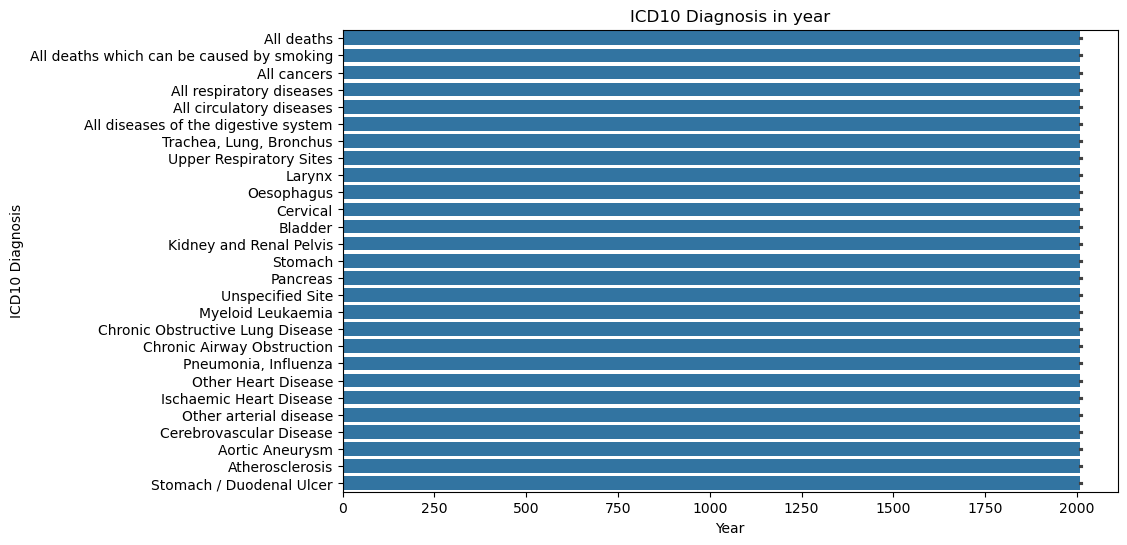

In [19]:
# ICD10 Diagnosis in each year
plt.figure(figsize=(10,6))
sns.barplot(x = fatalities_df['Year'], y = fatalities_df['ICD10 Diagnosis'])
plt.title('ICD10 Diagnosis in year')
plt.xlabel('Year')
plt.ylabel('ICD10 Diagnosis')
plt.show()

In [20]:
diagnosis_type = fatalities_df['Diagnosis Type'].value_counts()
diagnosis_type

Diagnosis Type
Cancers which can be caused by smoking                      726
Circulatory diseases which can be caused by smoking         396
Respiratory diseases which can be caused by smoking         198
All deaths                                                   66
All cancers                                                  66
All respiratory diseases                                     66
All circulatory diseases                                     66
All diseases of the digestive system                         66
Digestive diseases which can be caused caused by smoking     66
All deaths which can be caused by smoking                    33
Name: count, dtype: int64

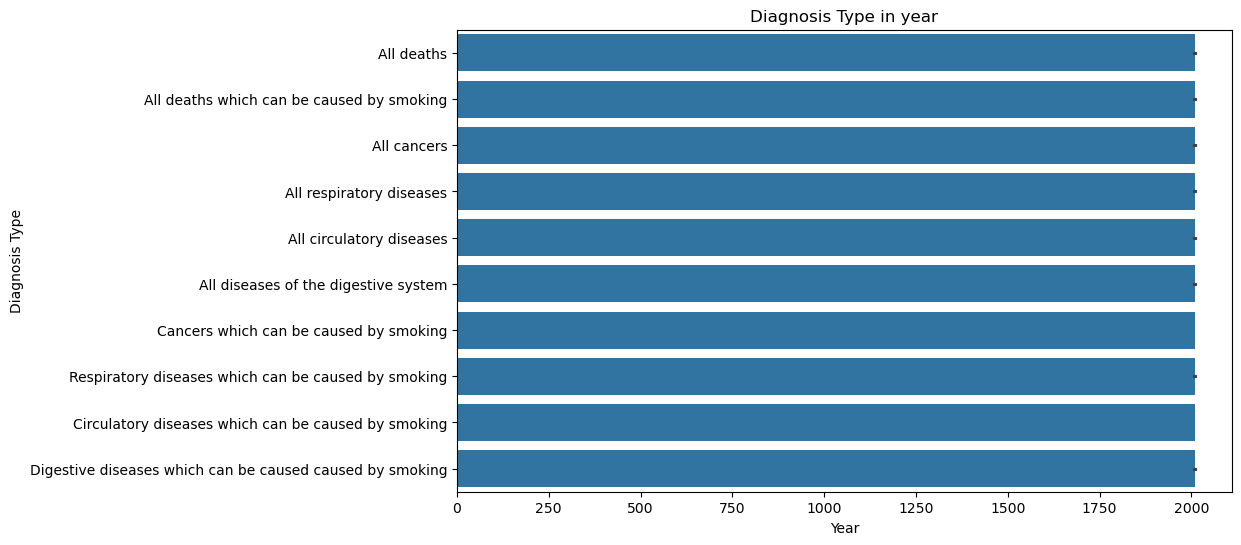

In [21]:
# Diagnosis Type in each year
plt.figure(figsize=(10,6))
sns.barplot(x = fatalities_df['Year'], y = fatalities_df['Diagnosis Type'])
plt.title('Diagnosis Type in year')
plt.xlabel('Year')
plt.ylabel('Diagnosis Type')
plt.show()

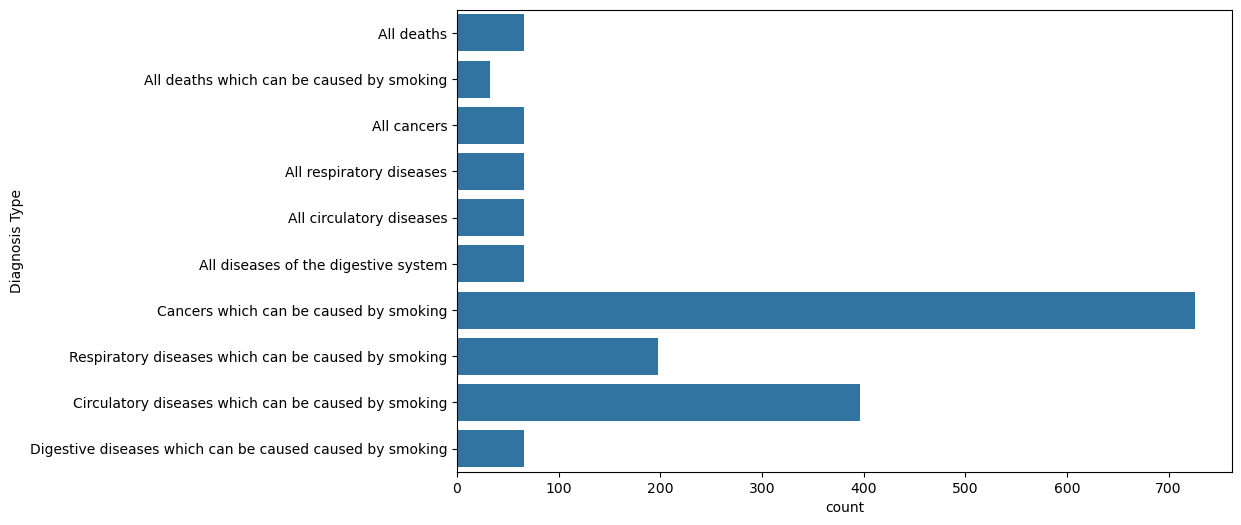

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y='Diagnosis Type', data=fatalities_df)
plt.show()

In [23]:
metric = fatalities_df['Metric'].value_counts()
metric

Metric
Number of observed deaths    891
Attributable number          858
Name: count, dtype: int64

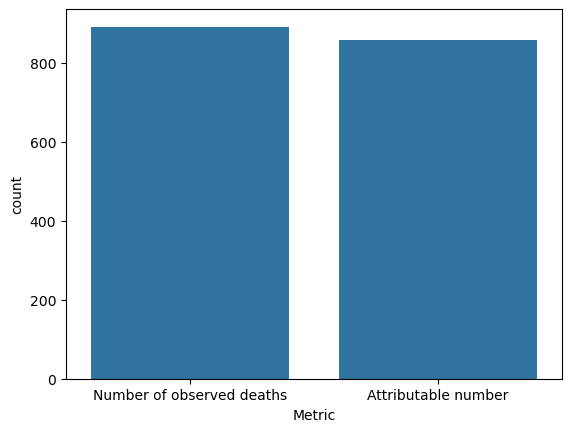

In [24]:
sns.countplot(x='Metric', data=fatalities_df)
plt.show()

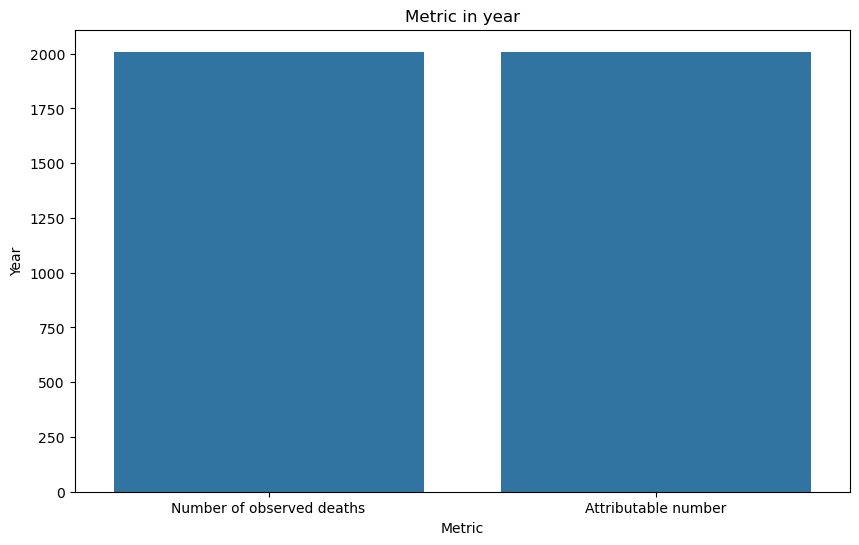

In [25]:
#Metric in Year
plt.figure(figsize=(10,6))
sns.barplot(y = fatalities_df['Year'], x = fatalities_df['Metric'])
plt.title('Metric in year')
plt.xlabel('Metric')
plt.ylabel('Year')
plt.show()

In [26]:
gender = fatalities_df['Sex'].value_counts()
gender

Sex
Unknown    583
Male       583
Female     583
Name: count, dtype: int64

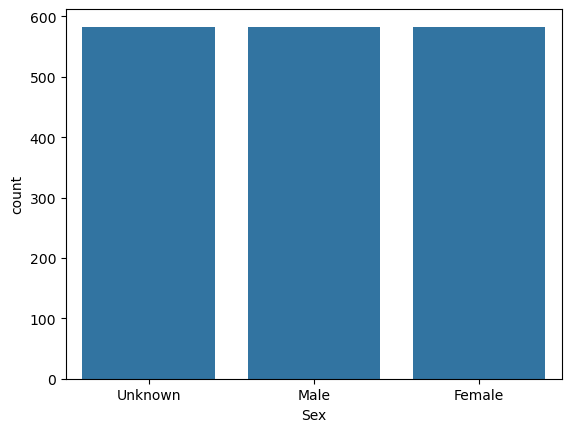

In [27]:
sns.countplot(x='Sex', data=fatalities_df)
plt.show()

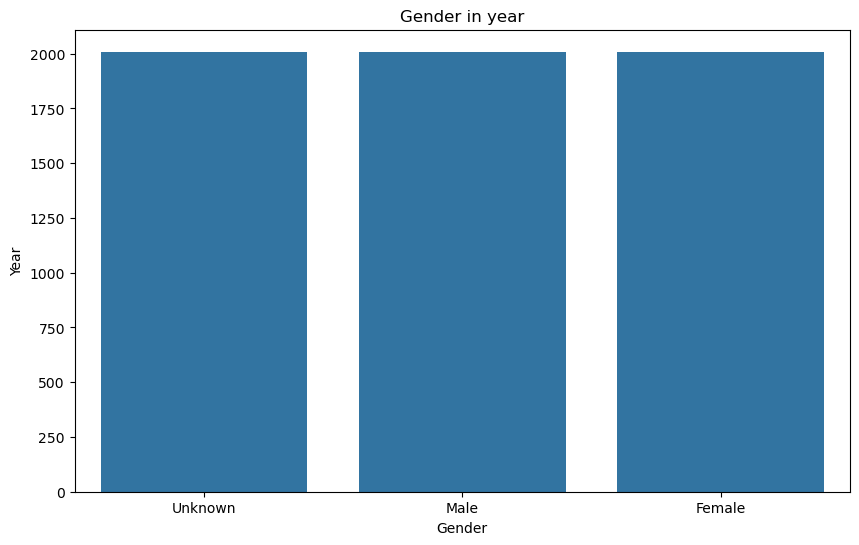

In [29]:
#Gender in year
plt.figure(figsize=(10,6))
sns.barplot(x = fatalities_df['Sex'], y = fatalities_df['Year'])
plt.title('Gender in year')
plt.xlabel('Gender')
plt.ylabel('Year')
plt.show()

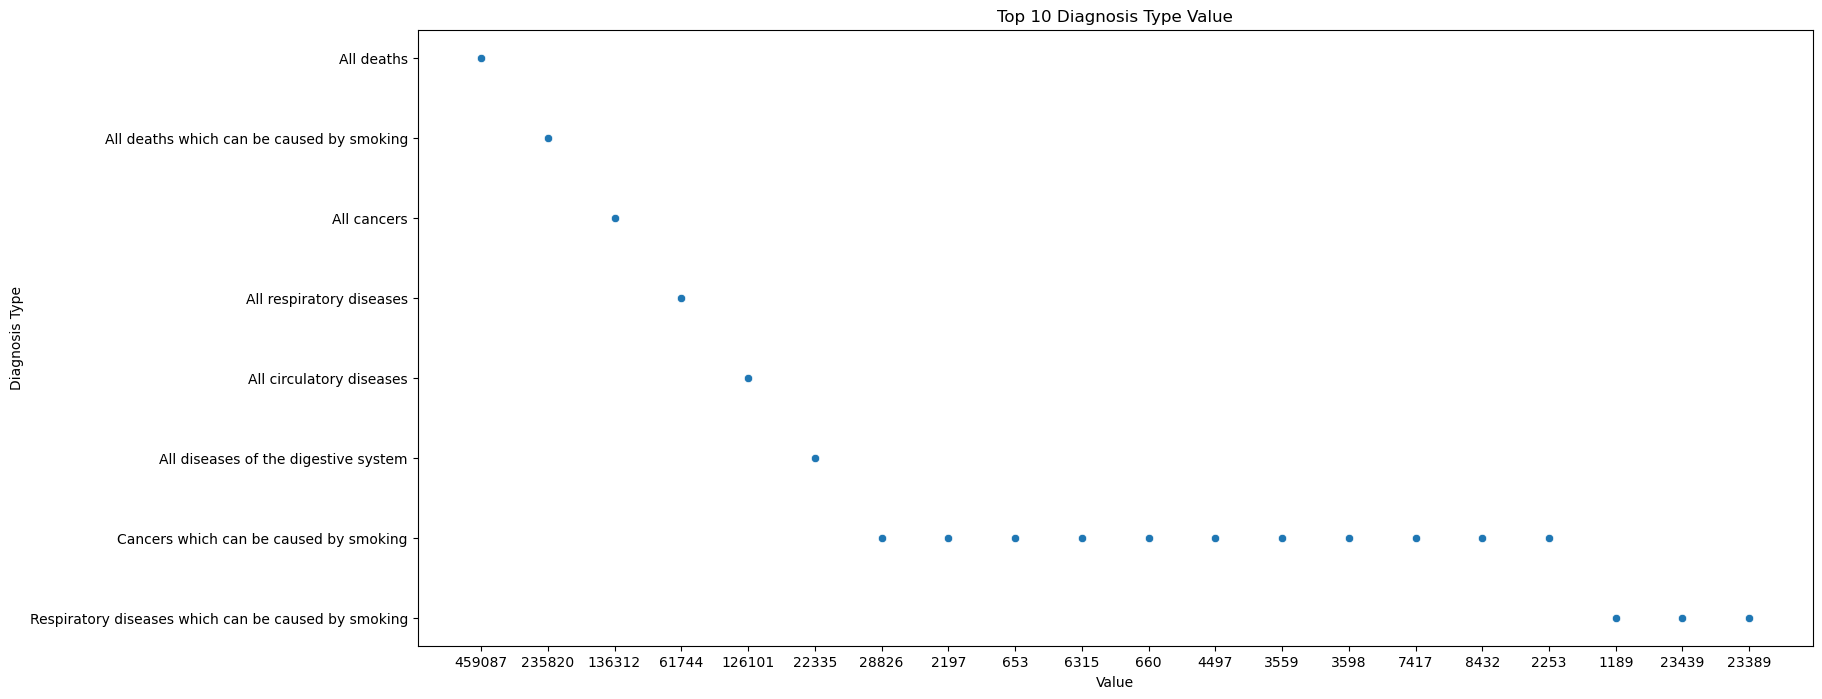

In [30]:
#Top 10 Diagnosis Type Value
plt.figure(figsize=(18,8))
sns.scatterplot(x = fatalities_df['Value'].head(20), y = fatalities_df['Diagnosis Type'])
plt.title('Top 10 Diagnosis Type Value')
plt.xlabel('Value')
plt.ylabel('Diagnosis Type')
plt.show()

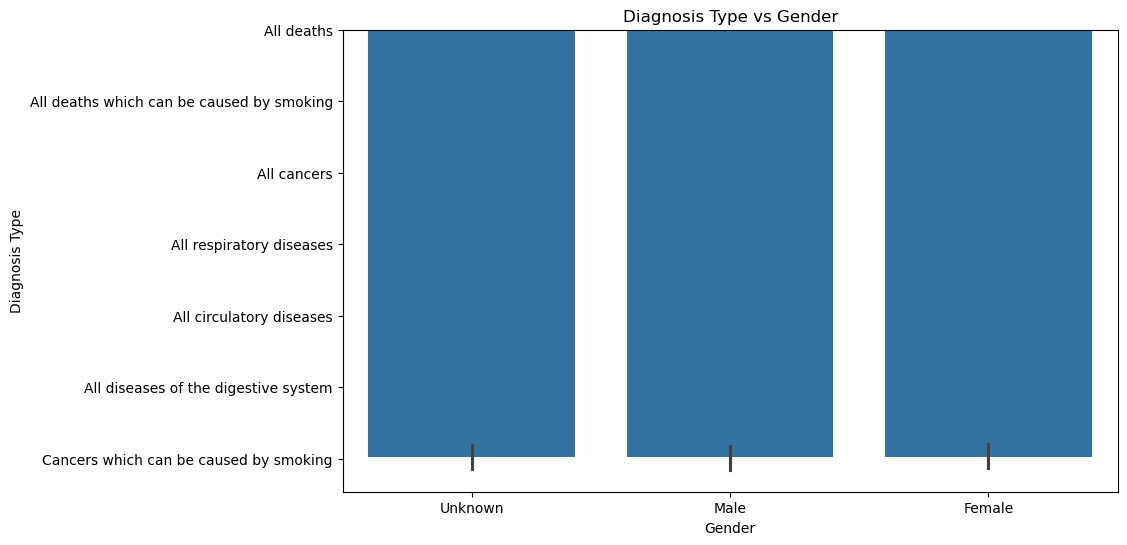

In [31]:
#Diagnosis Type vs Gender
plt.figure(figsize=(10,6))
sns.barplot(x = fatalities_df['Sex'], y = fatalities_df['Diagnosis Type'])
plt.title('Diagnosis Type vs Gender')
plt.xlabel('Gender')
plt.ylabel('Diagnosis Type')
plt.show()

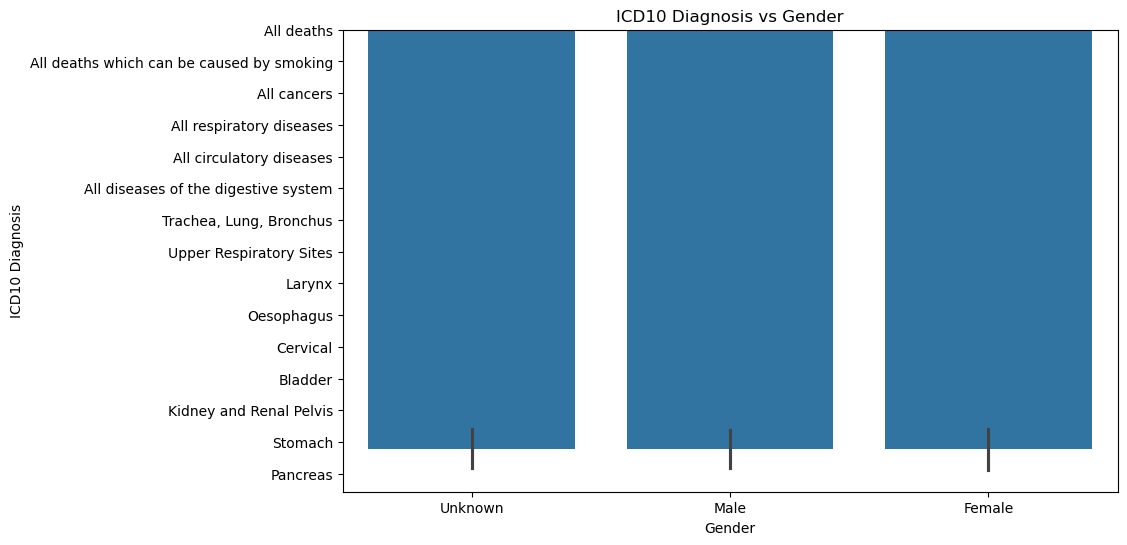

In [32]:
#ICD10 Diagnosis vs Gender
plt.figure(figsize=(10,6))
sns.barplot(x = fatalities_df['Sex'], y = fatalities_df['ICD10 Diagnosis'])
plt.title('ICD10 Diagnosis vs Gender')
plt.xlabel('Gender')
plt.ylabel('ICD10 Diagnosis')
plt.show()

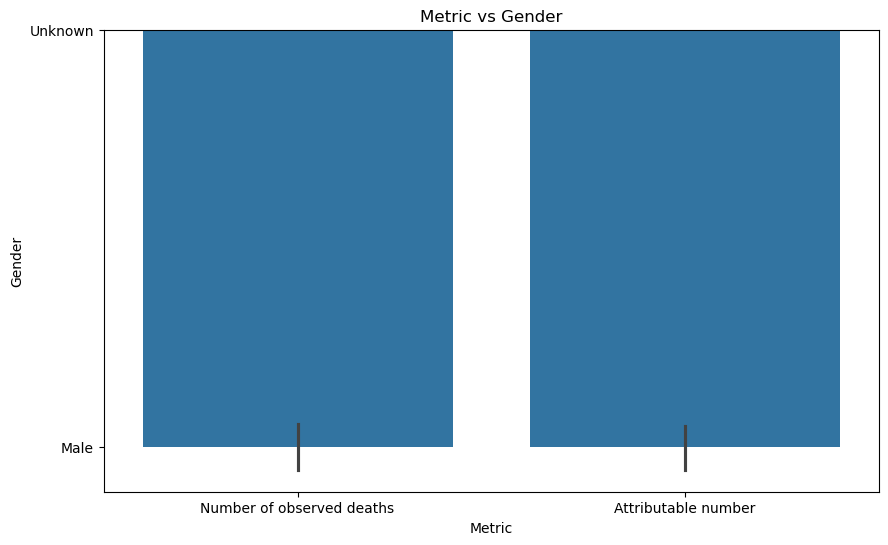

In [33]:
#Metric vs Gender
plt.figure(figsize=(10,6))
sns.barplot(y = fatalities_df['Sex'], x = fatalities_df['Metric'])
plt.title('Metric vs Gender')
plt.xlabel('Metric')
plt.ylabel('Gender')
plt.show()